In [1]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve(medical_charges_url,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7ce2bb5c3130>)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('medical.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#EDA

In [8]:
sns.set_style('darkgrid')


## Age

<Axes: xlabel='age', ylabel='Count'>

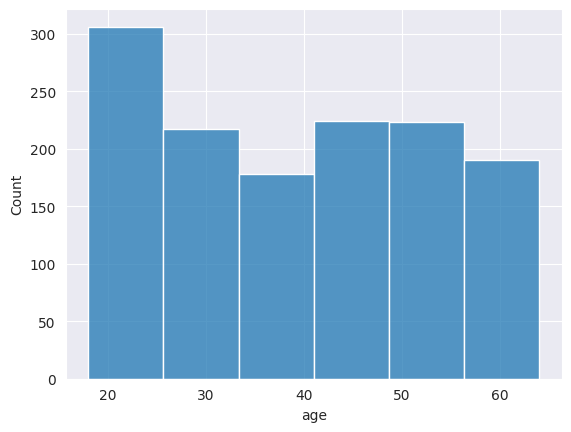

In [9]:
sns.histplot(df['age'],bins=6)

<Axes: ylabel='age'>

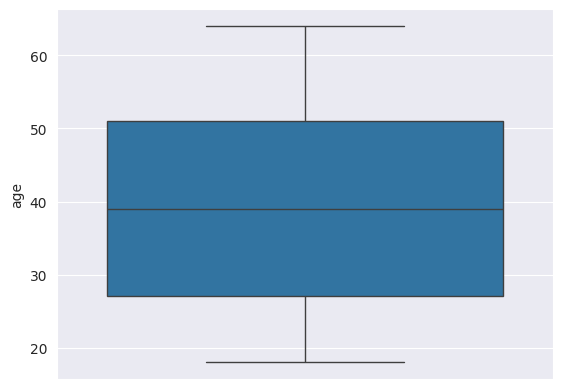

In [10]:
sns.boxplot(df['age'])

##BMI

<Axes: xlabel='bmi', ylabel='Count'>

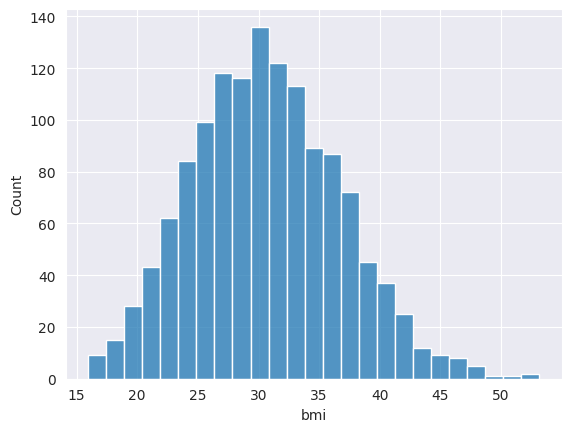

In [11]:
sns.histplot(df['bmi'])

<Axes: ylabel='bmi'>

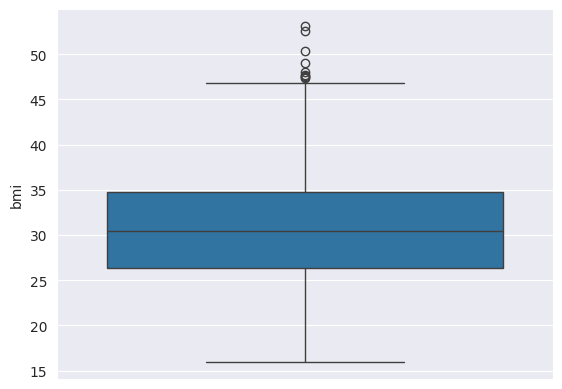

In [12]:
sns.boxplot(df['bmi'])

## charges

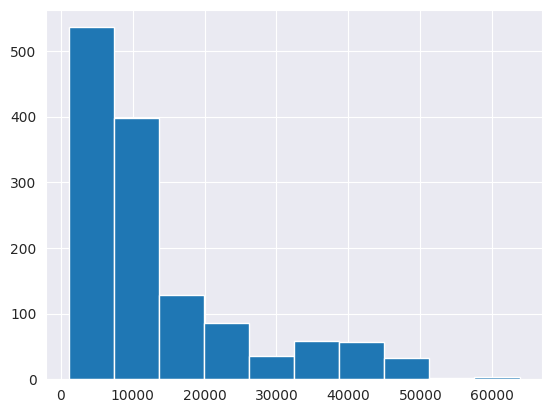

In [13]:
plt.hist(df['charges']);

<Axes: ylabel='charges'>

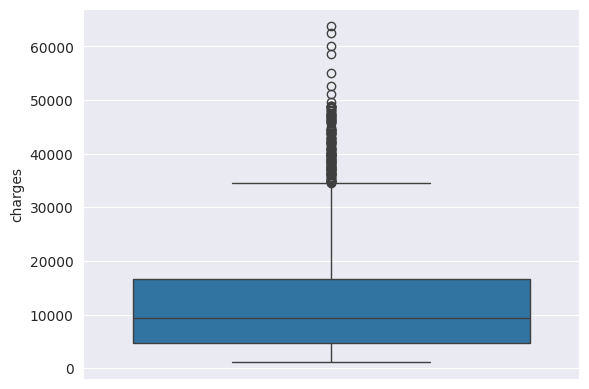

In [14]:
sns.boxplot(df['charges'])

In [15]:
import plotly.express as px

In [16]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

<Axes: xlabel='sex', ylabel='Count'>

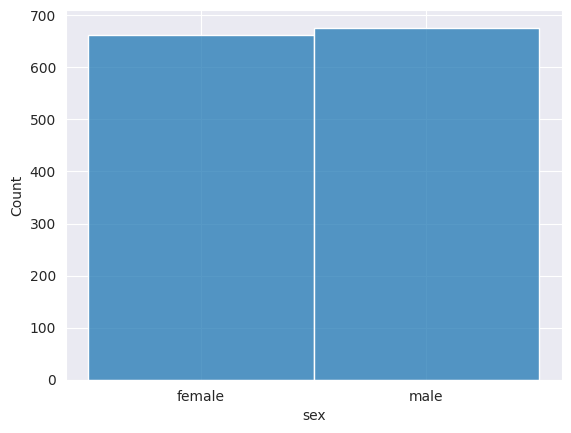

In [17]:
sns.histplot(df['sex'])

this shows that there is approximately equal number of male and female who are taking insurance

In [18]:
region=df['region'].value_counts().reset_index()
region

,region,count
0,southeast,364
1,southwest,325
2,northwest,325
3,northeast,324


([<matplotlib.patches.Wedge at 0x7ce280955390>,
 [Text(0.722119686055283, 0.8297850077046582, 'southeast'),
  Text(-0.8627681631663758, 0.6823716704454532, 'southwest'),
  Text(-0.7201694244483217, -0.8314782018127556, 'northwest'),
  Text(0.7967551940047443, -0.7584069889092945, 'northeast')],
 [Text(0.39388346512106337, 0.4526100042025408, '27%'),
  Text(-0.47060081627256856, 0.37220272933388354, '24%'),
  Text(-0.39281968606272083, -0.45353356462513933, '24%'),
  Text(0.4345937421844059, -0.41367653940506965, '24%')])

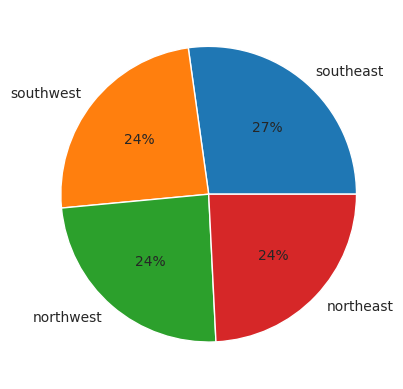

In [19]:
plt.pie(region['count'],labels=region['region'],autopct='%.0f%%')

In [20]:
px.histogram(df,x='smoker',color='sex',title='smoker')

In [21]:
fig = px.scatter(df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [22]:
fig = px.scatter(df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

1. we could see that with age the charges are increasing and among somkers it is quite high and we got three cluster
2. in second plot we could see that higher bmi and smokers have higher  charges

In [23]:
px.violin(df,x='children',y='charges')

## correlation

In [24]:
df['charges'].corr(df['age'])

0.2990081933306476

In [25]:
df['charges'].corr(df['bmi'])

0.19834096883362895

In [26]:
df['charges'].corr(df['children'])

0.06799822684790478

to check correlation between categorical data we need to convet it into numerical data

In [46]:
# smokers data
smokers=df['smoker'].map({'no':0,'yes':1})
smokers

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [28]:
df['charges'].corr(smokers)

0.787251430498478

we could see that charges correlation with smokers and age is high

Though the correlation is high we cannot say that high charges are caused due to age and smoking because there could be other factors such  as diseases and accidents

# Regression

we will first look for non smokers people relation of age with charges

In [29]:
non_smokers=df[df['smoker']== 'no']
non_smokers

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [30]:
x=non_smokers.iloc[:,:1]
y=non_smokers.iloc[:,-1]

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [32]:
print(x_train)
print(y_train)

     age
258   51
580   59
163   32
520   50
875   23
..   ...
457   57
582   39
387   50
614   20
657   27

[851 rows x 1 columns]
258    11520.09985
580    12913.99240
163     5152.13400
520    25656.57526
875     2690.11380
          ...     
457    11840.77505
582     6356.27070
387    30284.64294
614     1880.07000
657     4058.71245
Name: charges, Length: 851, dtype: float64


while using these model input must be 2d array

In [33]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [34]:
regressor.predict([[21]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([3446.21773096])

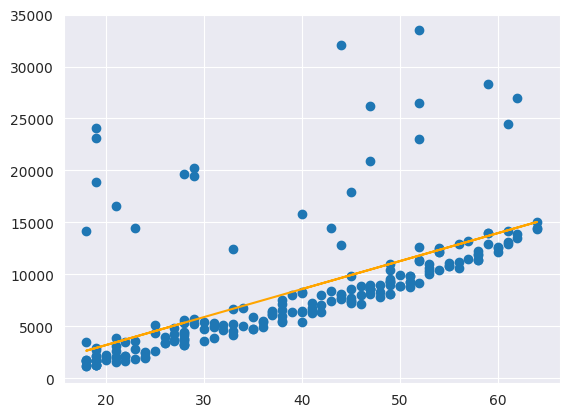

In [35]:
plt.scatter(x_test,y_test)
plt.plot(x_test,regressor.predict(x_test),color='orange')

model coefficients

In [36]:
print(regressor.coef_)

[269.59962655]


In [37]:
print(regressor.intercept_)

-2215.3744266063622


checking for smokers and non smokers and the charges

In [40]:
# we want to check the realtion between all the dependent variable and our independent variable so we will be considering them as input
# but we have some categorical data so we need to convert it into numerical data
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
enc=encoder.fit(df[['region']])
enc

OneHotEncoder()

In [44]:
num_region=encoder.transform(df[['region']]).toarray()
num_region


array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [51]:
df[['northeast', 'northwest', 'southeast', 'southwest']]=num_region
df['smoker']=df['smoker'].map({'no':0,'yes':1})
df.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,female,27.900,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,male,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,male,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,male,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,male,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0


since there are outliers which can lead to data spillage we will use feature scaling

In [64]:
input=['age','bmi','children','smoker']
data=df[input]
data

,age,bmi,children,smoker
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,3,0
3,33,22.705,0,0
4,32,28.880,0,0
...,...,...,...,...
1333,50,30.970,3,0
1334,18,31.920,0,0
1335,18,36.850,0,0
1336,21,25.800,0,0


In [65]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(data)

StandardScaler()

In [66]:
new_data=sc.transform(data)
new_data

array([[-1.43876426, -0.45332   , -0.90861367,  1.97058663],
       [-1.50996545,  0.5096211 , -0.07876719, -0.5074631 ],
       [-0.79795355,  0.38330685,  1.58092576, -0.5074631 ],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, -0.5074631 ],
       [-1.29636188, -0.79781341, -0.90861367, -0.5074631 ],
       [ 1.55168573, -0.26138796, -0.90861367,  1.97058663]])

In [72]:
# we will use multiple linear regression
df[input]=new_data
df.head()
final_input=['age','bmi','children','smoker','northeast', 'northwest', 'southeast', 'southwest']
X=df[final_input]
X.head()

,age,bmi,children,smoker,northeast,northwest,southeast,southwest
0,-1.438764,-0.453320,-0.908614,1.970587,0.0,0.0,0.0,1.0
1,-1.509965,0.509621,-0.078767,-0.507463,0.0,0.0,1.0,0.0
2,-0.797954,0.383307,1.580926,-0.507463,0.0,0.0,1.0,0.0
3,-0.441948,-1.305531,-0.908614,-0.507463,0.0,1.0,0.0,0.0
4,-0.513149,-0.292556,-0.908614,-0.507463,0.0,1.0,0.0,0.0


In [85]:
X_train,X_test,Y_train,Y_test=train_test_split(X,df['charges'],test_size=0.2,random_state=5)

print(X_train)
print(Y_train)

           age       bmi  children    smoker  northeast  northwest  southeast  \
1261 -0.797954  1.055889 -0.078767 -0.507463        0.0        0.0        0.0   
816  -1.082758 -1.056183 -0.908614 -0.507463        0.0        1.0        0.0   
581  -1.438764 -0.012040 -0.908614 -0.507463        0.0        1.0        0.0   
1328 -1.153959 -1.056183  0.751079 -0.507463        1.0        0.0        0.0   
492  -1.509965 -0.915925 -0.908614 -0.507463        1.0        0.0        0.0   
...        ...       ...       ...       ...        ...        ...        ...   
73    1.338082  0.220903 -0.078767 -0.507463        0.0        0.0        1.0   
1142  0.910875 -0.952015 -0.908614 -0.507463        0.0        0.0        1.0   
998  -0.441948  0.923013  1.580926 -0.507463        1.0        0.0        0.0   
206   1.409283 -0.699387 -0.908614 -0.507463        0.0        0.0        1.0   
867   1.266881  2.138583 -0.078767 -0.507463        0.0        0.0        0.0   

      southwest  
1261     

fitting the model

In [76]:
regressor.fit(X_train,Y_train)

LinearRegression()

# predicting the result

In [90]:
Y_result=np.array(regressor.predict(X_test))
Y_test=np.array(Y_test)
np.set_printoptions(precision=2)
print (np.concatenate((Y_result.reshape(len(Y_result),1),Y_test.reshape(len(Y_test),1)),1))


[[ 2676.72  2203.47]
 [27761.61 18648.42]
 [11715.92 11305.93]
 [ 4837.8   2166.73]
 [ 8128.34  5245.23]
 [34826.49 48885.14]
 [11886.13  8068.19]
 [10940.15 19749.38]
 [ 8219.66  3238.44]
 [11324.66  9869.81]
 [15599.36 12979.36]
 [11046.85 11165.42]
 [ 4870.41  1633.04]
 [ 9374.01 21232.18]
 [ 8188.23  8534.67]
 [ 9009.01  5584.31]
 [31733.71 21259.38]
 [12826.16  9583.89]
 [13151.89 11552.9 ]
 [ 7412.81  6555.07]
 [28446.84 35595.59]
 [ 2072.51  2710.83]
 [ 3120.83  2128.43]
 [ 3926.36  2867.12]
 [ 2370.24  3561.89]
 [ 9575.93  5630.46]
 [36694.43 44423.8 ]
 [17227.09 14410.93]
 [10762.53 13415.04]
 [13973.01 13880.95]
 [13171.12  7650.77]
 [ 1331.38  1632.04]
 [ 5788.65  3579.83]
 [10627.41  8283.68]
 [31267.59 21223.68]
 [ 4241.41  1141.45]
 [ 6798.81  5261.47]
 [ 2932.36  1526.31]
 [ 6360.21  3987.93]
 [ 5701.28 16796.41]
 [ 3094.42 11482.63]
 [37120.71 29330.98]
 [30702.5  51194.56]
 [30043.43 20234.85]
 [10436.1  10106.13]
 [ 7734.34  6837.37]
 [35121.58 41097.16]
 [ 3351.03  2

# evaluating the model accuracy

we use r2_score that is to evaluate the model

In [91]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_result)

0.7785122808205929


the reason for low r2_score could be due to presence of oultiers in our data